# Data Loading

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings

# Suppress the SettingWithCopyWarning
warnings.simplefilter('ignore', category=pd.errors.SettingWithCopyWarning)

# Load the dataset
df = pd.read_csv("D:/heart_disease_prediction/data/heart_disease_uci.csv")

# Display the first few rows of the dataset

df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
#check the number of rows of the dataset
print(f"Number of rows of {df.shape[0]}")
print(f"Number of columns of {df.shape[1]}")

Number of rows of 920
Number of columns of 16


In [7]:
# check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(f"Missing values: {missing_values}")

Missing values: ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


# 2.Target Variable Analysis

## 2.1 Distribution of the Target Analysis
### In this step, we will analyze the distribution of the target variable , which represents the severity of the target variable.The target variable has 5 classes:
* 0: No heart disease
* 1: Mild heart disease
* 2: Moderate heart disease
* 3: Severe heart disease
* 4: Very severe heart disease

In [9]:
# Distribution of the target variable
target_counts = df['num'].unique()
target_counts

array([0, 2, 1, 3, 4], dtype=int64)

Target Variable Distribution: num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14880\640857712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="num", palette='viridis')


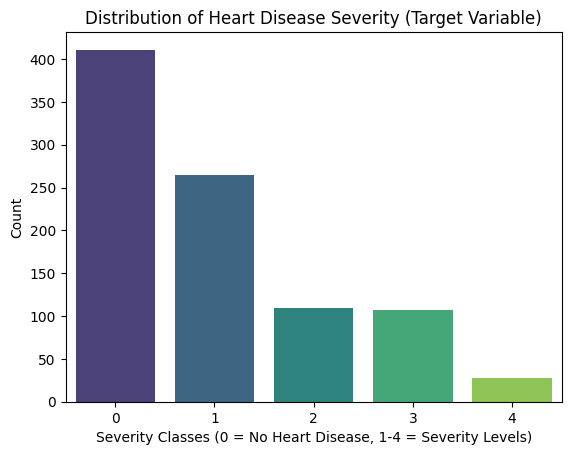

In [11]:
target_counts = df["num"].value_counts()
print(f"Target Variable Distribution: {target_counts}")

# Barplot
sns.countplot(data=df, x="num", palette='viridis')
plt.title("Distribution of Heart Disease Severity (Target Variable)")
plt.xlabel("Severity Classes (0 = No Heart Disease, 1-4 = Severity Levels)")
plt.ylabel("Count")
plt.show()

## 2.2 Number of Patients in Each Class
### Now that we know the class distribution, we can calculate the exact number of patients that belong to each class. This will help us quantify the prevalence of each level of heart disease severity.



In [12]:
# Count of patients with and without heart disease
num_with_disease = df[df['num'].isin([1, 2, 3, 4])].shape[0]
num_without_disease = df[df['num'] == 0].shape[0]

# Display the counts of patients with and without heart disease
print("### Counts of patients with and without heart ###")

print(f"Patients with heart disease: {num_with_disease}")

print(f"Patients without heart disease: {num_without_disease}")
# Total number of patients in the dataset
total = len(df)

# Display the distribution of the target variable
print("### Target Variable Distribution (Heart Disease Severity Classes) ###")

for class_label, count in target_counts.items():
    percentage = (count / total) * 100
    print(f"Class {class_label}: {count} ({percentage:.2f}%)")

### Counts of patients with and without heart ###
Patients with heart disease: 509
Patients without heart disease: 411
### Target Variable Distribution (Heart Disease Severity Classes) ###
Class 0: 411 (44.67%)
Class 1: 265 (28.80%)
Class 2: 109 (11.85%)
Class 3: 107 (11.63%)
Class 4: 28 (3.04%)


### The number of patients in each class is as follows:

* Class 0 (No heart disease): 411 patients (44.67%)
* Class 1 (Mild heart disease): 265 patients (28.80%)
* Class 2 (Moderate heart disease): 109 patients (11.85%)
* Class 3 (Severe heart disease): 107 patients (11.63%)
* Class 4 (Very severe heart disease): 28 patients (3.04%)
This shows that the dataset is imbalanced, with Class 0 (No heart disease) being the most common, followed by Class 1 (Mild heart disease). The more severe classes (Classes 3 and 4) have significantly fewer patients, which may indicate that severe cases of heart disease are rarer in the population sampled.

# 3. Demographic Insights

### In this step, we analyze the gender distribution of the patients in the dataset. The sex column in the dataset represents the gender, where 1 indicates male patients and 0 indicates female patients.



In [13]:
# Demographic Insights

# 3.1 Age Range of Patients
min_age = df["age"].min()
max_age = df["age"].max()
min_range = max_age - min_age

# Display the minimum and maximum ages of patients

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Range: {min_range} years")



Minimum Age: 28
Maximum Age: 77
Age Range: 49 years


In [14]:
# Summarize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

Mean 53.51086956521739
Median 54.0
Mode 54


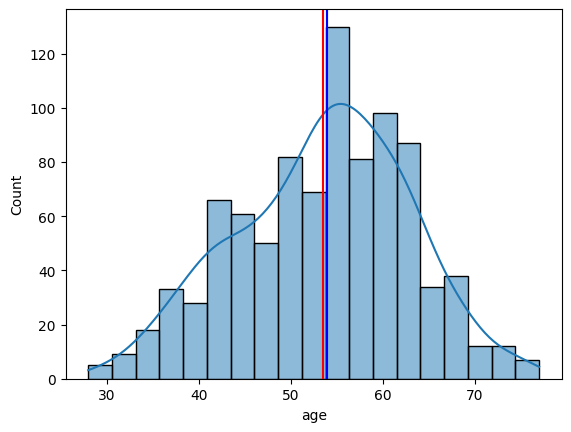

In [15]:
# Summarize the age column in graph
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color="red")
plt.axvline(df["age"].median(), color="green")
plt.axvline(df['age'].mode()[0], color='blue')

print(f"Mean {df['age'].mean()}")

print(f"Median {df['age'].median()}")

print(f"Mode {df['age'].mode()[0]}")

Gender Distribution: sex
Male      726
Female    194
Name: count, dtype: int64
Male patients: 194
Female patients: 726


C:\Users\DELL\AppData\Local\Temp\ipykernel_14880\2913729440.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='mako')


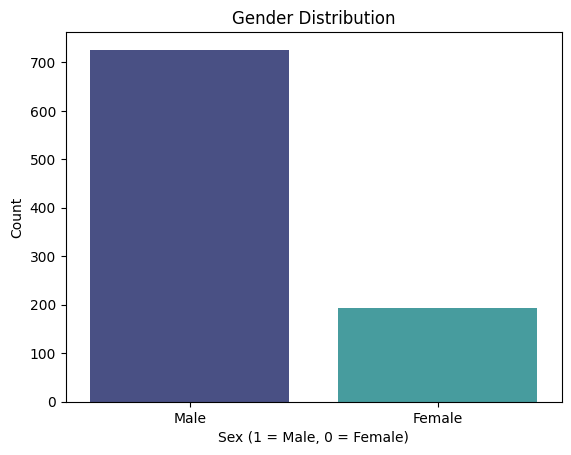

In [16]:
# 3.2 Gender Dist of the patients
gender_counts = df['sex'].value_counts()  #sex :1 for male 0 for female
#display gender distribution

print(f"Gender Distribution: {gender_counts}")
print(f"Male patients: {gender_counts[1]}")
print(f"Female patients: {gender_counts[0]}")

# Visualize the gender distribution

sns.countplot(data=df, x='sex', palette='mako')
plt.title("Gender Distribution")
plt.xlabel("Sex (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.show()

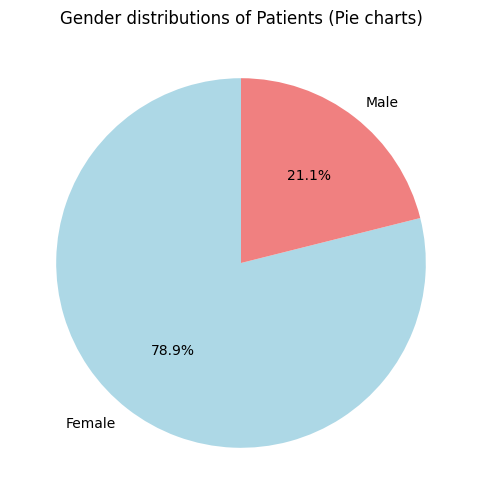

In [19]:
# Pie chart for gender distribution
gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=["Female", "Male"], startangle=90, figsize=(6, 6))
plt.title('Gender distributions of Patients (Pie charts)')
plt.ylabel('')
plt.show()


In [20]:
## Exploring the gender distributions based on age
fig = px.histogram(df, x='age', color='sex')
fig.show()

# 3.1 Age Range of Patients¶
## The age range of patients in the dataset spans from 28 years (minimum age) to 77 years (maximum age).
## The age range of 49 years indicates a wide diversity in the age groups of the patients, which is important when analyzing how age correlates with heart disease risk. It suggests that heart disease affects a broad spectrum of ages, from relatively younger patients to older individuals.
# 3.2 Gender Distribution of the Patients
## The dataset contains 726 male patients and 194 female patients.
## This indicates that the dataset has a higher number of male patients, with males making up a larger proportion of the dataset.
## The gender imbalance may have implications for analysis, and it’s important to ensure that the findings regarding heart disease risk factors are not biased toward one gender.
## Further analysis may be needed to understand if gender impacts the presence or severity of heart disease in this dataset, given the uneven distribution.


# 4. Health Metrics


In [21]:
# Calculate average and median values for resting blood pressure (trestbps)
avg_trestbps = df['trestbps'].mean()
median_trestbps = df['trestbps'].median()

# Calculate average and median values for serum cholesterol (chol)
avg_chol = df['chol'].mean()
median_chol = df['chol'].median()

# Calculate average and median values for maximum heart rate achieved (thalach)
avg_thalach = df['thalch'].mean()
median_thalach = df['thalch'].median()

# Display the results
print("### Health Metrics ###")
print(f"Average Resting Blood Pressure (trestbps): {avg_trestbps:.2f}")
print(f"Median Resting Blood Pressure (trestbps): {median_trestbps}")
print(f"Average Serum Cholesterol (chol): {avg_chol:.2f}")
print(f"Median Serum Cholesterol (chol): {median_chol}")
print(f"Average Maximum Heart Rate Achieved (thalach): {avg_thalach:.2f}")
print(f"Median Maximum Heart Rate Achieved (thalach): {median_thalach}")


### Health Metrics ###
Average Resting Blood Pressure (trestbps): 132.13
Median Resting Blood Pressure (trestbps): 130.0
Average Serum Cholesterol (chol): 199.13
Median Serum Cholesterol (chol): 223.0
Average Maximum Heart Rate Achieved (thalach): 137.55
Median Maximum Heart Rate Achieved (thalach): 140.0


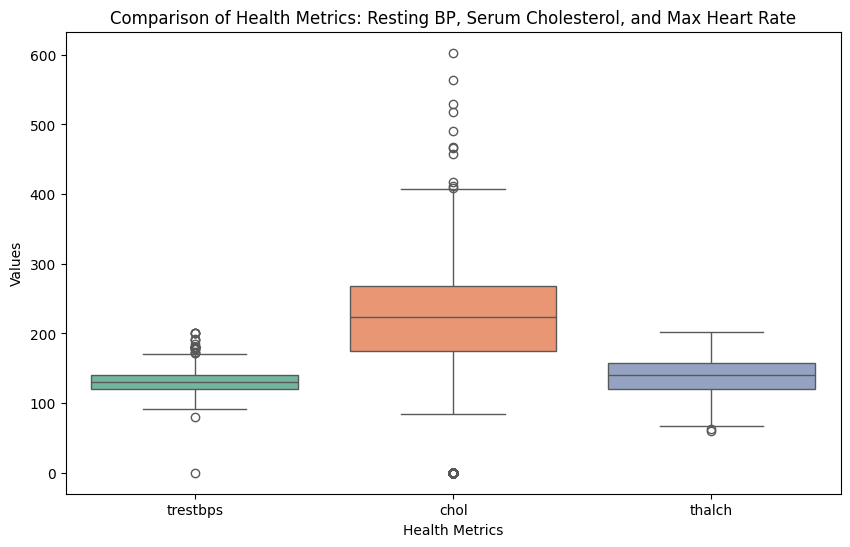

In [22]:


# Combine the relevant columns into a new DataFrame for plotting
health_metrics = df[['trestbps', 'chol', 'thalch']]

# Set up the figure and plot
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=health_metrics, palette='Set2')

# Customize the plot
plt.title('Comparison of Health Metrics: Resting BP, Serum Cholesterol, and Max Heart Rate')
plt.xlabel('Health Metrics')
plt.ylabel('Values')

# Show the plot
plt.show()


### 4. Health Metrics

In this analysis, we examined three key health metrics: **Resting Blood Pressure (trestbps)**, **Serum Cholesterol (chol)**, and **Maximum Heart Rate Achieved (thalach)**. Here are the concise observations:

- **Resting Blood Pressure (trestbps)**:
  - **Average**: 132.13 mm Hg, **Median**: 130.0 mm Hg.
  - Many outliers, with values mainly between **100-120 mm Hg**, indicating variability in blood pressure, with some potential cases of hypertension.

- **Serum Cholesterol (chol)**:
  - **Average**: 199.13 mg/dl, **Median**: 223.0 mg/dl.
  - Primarily between **150-250 mg/dl**, but with **many outliers**, suggesting some patients have unusually high or low cholesterol levels.

- **Maximum Heart Rate Achieved (thalach)**:
  - **Average**: 137.55 bpm, **Median**: 140.0 bpm.
  - Most values fall between **100-120 bpm**, with no significant outliers, indicating a more consistent response to exercise testing.

### Summary:
- **Blood pressure** shows variability with some extreme cases, while **cholesterol** levels have many outliers indicating abnormal values.
- **Maximum heart rate** is more uniform, suggesting fewer irregularities in the data.

These insights provide a clearer understanding of the patient's health metrics and their potential relationship to heart disease risk.


### 5 Categorical Features

#### **5.1 Exercise-Induced Angina (exang)**:
- **Number of patients with exercise-induced angina**: We will count how many patients have **True** (indicating they experience exercise-induced angina) and how many have **False** (indicating they do not).
  
#### **5.2 Chest Pain Type (cp)**:
- We will analyze the distribution of chest pain types. The categories are:
  - **0**: Typical Angina
  - **1**: Atypical Angina
  - **2**: Non-Anginal Pain
  - **3**: Asymptomatic
- We will count how many patients fall into each of these categories to understand which type of chest pain is most common.

### Exercise-Induced Angina (exang) ###
Patients with exercise-induced angina (True): 337 (36.63%)
Patients without exercise-induced angina (False): 528 (57.39%)



C:\Users\DELL\AppData\Local\Temp\ipykernel_14880\3930090973.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




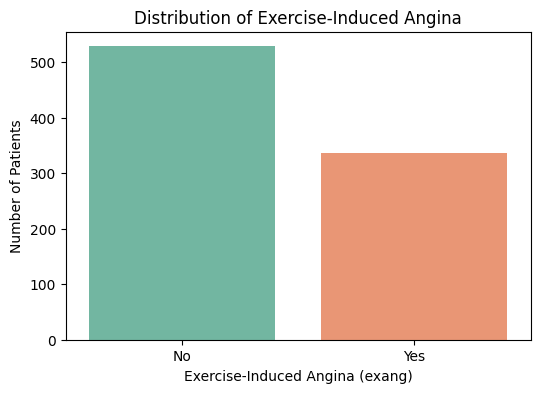

In [23]:
# 5.1 Exercise-Induced Angina (exang)
# Count of patients with exercise-induced angina (True/False)
exang_counts = df['exang'].value_counts()
exang_percentage = (exang_counts / len(df)) * 100

# Display counts and percentages for exercise-induced angina
print("### Exercise-Induced Angina (exang) ###")
print(f"Patients with exercise-induced angina (True): {exang_counts.iloc[1]} ({exang_percentage.iloc[1]:.2f}%)")
print(f"Patients without exercise-induced angina (False): {exang_counts.iloc[0]} ({exang_percentage.iloc[0]:.2f}%)\n")


# Plot for Exercise-Induced Angina (exang)
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', data=df, palette='Set2')
plt.title('Distribution of Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()



Unique values in cp column: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
### Chest Pain Type (cp) ###
Unexpected label asymptomatic: 496 patients
Unexpected label non-anginal: 204 patients
Unexpected label atypical angina: 174 patients
Unexpected label typical angina: 46 patients


C:\Users\DELL\AppData\Local\Temp\ipykernel_14880\1424172333.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




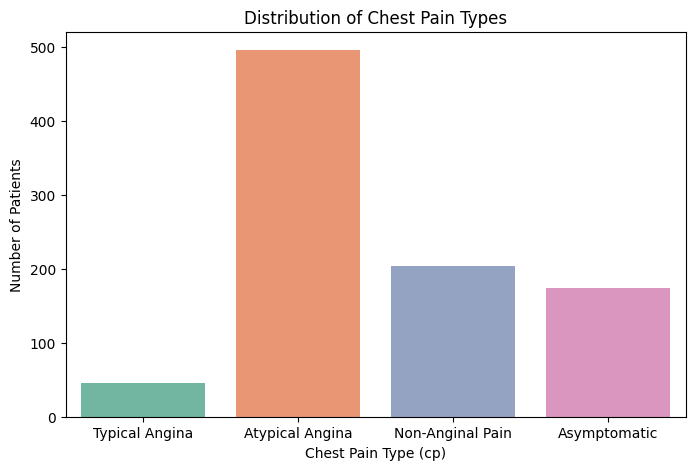

In [24]:
# 5.2 Chest Pain Type (cp)
# Count of patients in each chest pain type
cp_counts = df['cp'].value_counts()
cp_percentage = (cp_counts / len(df)) * 100

# Check the unique values in 'cp' column to ensure they're as expected
print("Unique values in cp column:", df['cp'].unique())

# Define the chest pain labels
cp_labels = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}

# Display counts and percentages for chest pain types
print("### Chest Pain Type (cp) ###")
for label, count in cp_counts.items():
    if label in cp_labels:
        print(f"{cp_labels[label]}: {count} patients ({cp_percentage[label]:.2f}%)")
    else:
        print(f"Unexpected label {label}: {count} patients")
        # Plot for Chest Pain Type (cp)
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=df, palette='Set2')
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.show()



### Insights Categorical Features:

#### **Exercise-Induced Angina (exang)**:
- A total of **337** patients (36.63%) experience exercise-induced angina, while **528** patients (57.39%) do not.
- The majority of patients do not experience exercise-induced angina.

#### **Chest Pain Type (cp)**:
- Unexpected labels in the `cp` column (e.g., "asymptomatic", "non-anginal", "atypical angina", "typical angina") are found.
- These inconsistencies in labeling should be addressed before further analysis, as they don't align with the expected values in the `cp_labels` dictionary.

### Conclusion:
- **Exercise-induced angina** is relatively common among patients.
- **Chest pain types** need to be cleaned and standardized for accurate analysis.


### 6. Visual Analysis
    -6.1 Plot the age distribution of the patients.
    -6.2 Compare the average cholesterol levels between patients with and without heart disease.


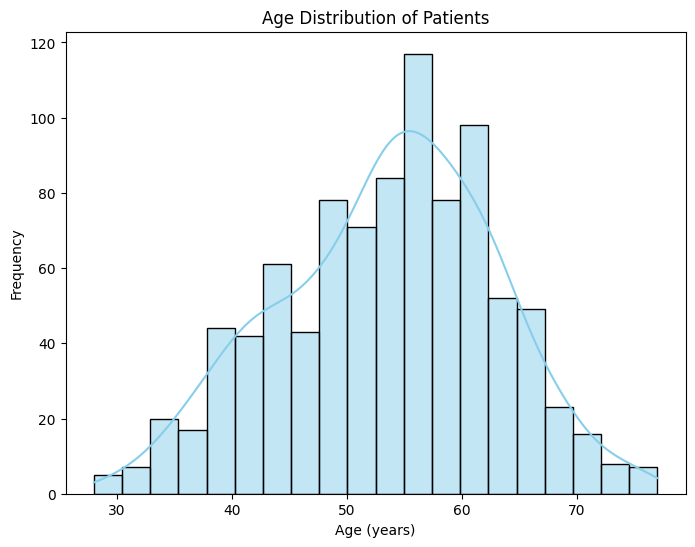

In [25]:
# 6.1 Plot the Age Distribution of the Patients
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()


Average Cholesterol Levels by Heart Disease Severity:
Class 0: 227.91 mg/dl
Class 1: 195.26 mg/dl
Class 2: 143.86 mg/dl
Class 3: 159.72 mg/dl
Class 4: 192.15 mg/dl


C:\Users\DELL\AppData\Local\Temp\ipykernel_14880\996269631.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




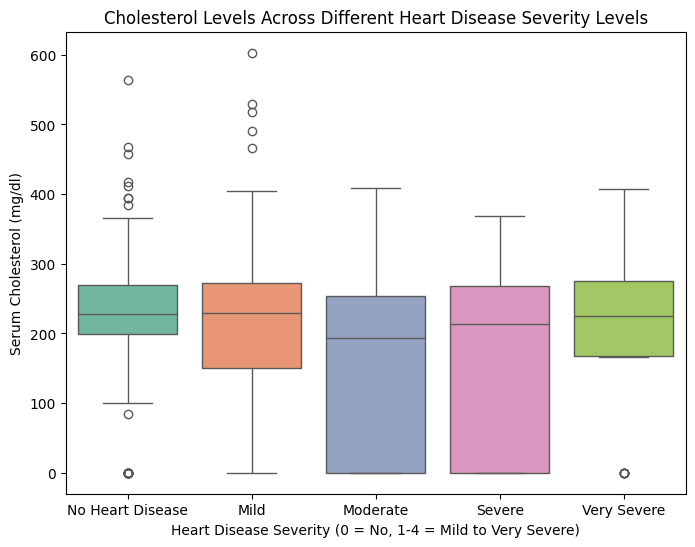

In [26]:

# 6.2 Compare the Average Cholesterol Levels Between Patients with and Without Heart Disease
# 6.2 Compare the Average Cholesterol Levels Between Patients with and Without Heart Disease
# Calculate the average cholesterol level for each heart disease severity class (0-4)
avg_chol_per_class = df.groupby('num')['chol'].mean()

# Display the average cholesterol levels for each class
print("Average Cholesterol Levels by Heart Disease Severity:")
for class_label, avg_chol in avg_chol_per_class.items():
    print(f"Class {class_label}: {avg_chol:.2f} mg/dl")



# Visualizing the cholesterol comparison using a boxplot for all five classes of heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels Across Different Heart Disease Severity Levels')
plt.xlabel('Heart Disease Severity (0 = No, 1-4 = Mild to Very Severe)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.xticks([0, 1, 2, 3, 4], ['No Heart Disease', 'Mild', 'Moderate', 'Severe', 'Very Severe'])
plt.show()

#### Average Cholesterol Levels by Heart Disease Severity:
- **Class 0** (No Heart Disease): 227.91 mg/dl
- **Class 1** (Mild Heart Disease): 195.26 mg/dl
- **Class 2** (Moderate Heart Disease): 143.86 mg/dl
- **Class 3** (Severe Heart Disease): 159.72 mg/dl
- **Class 4** (Very Severe Heart Disease): 192.15 mg/dl


### 7. Outliers:
    -7.1 Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)?


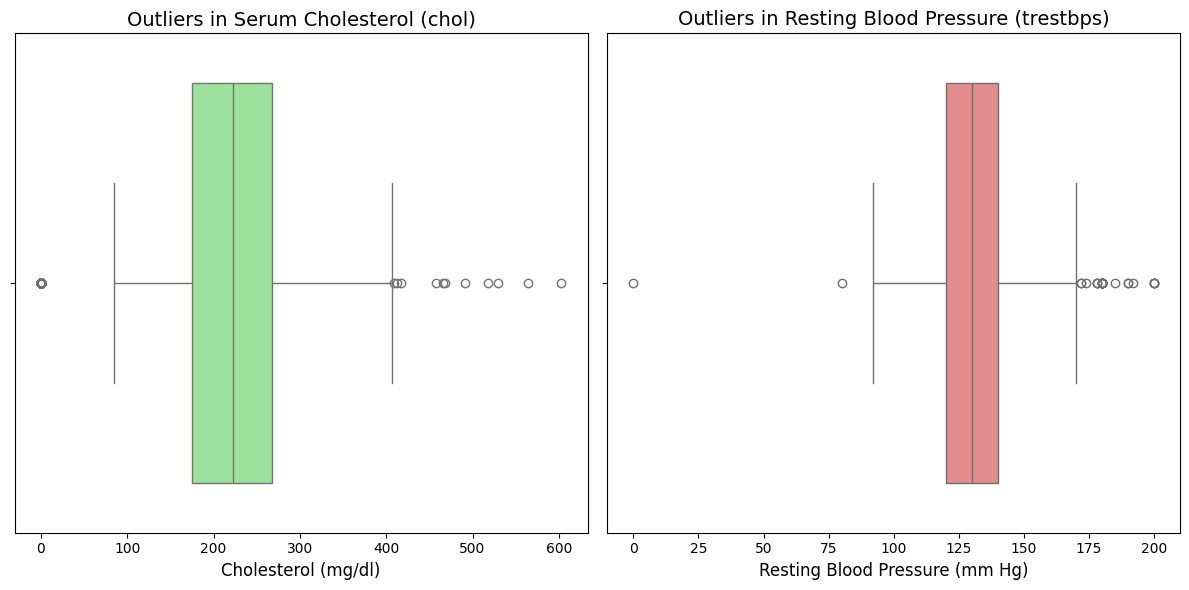

In [27]:
# 7.1 Plot both boxplots for Cholesterol and Resting Blood Pressure in a single figure
plt.figure(figsize=(12, 6))

# Plotting Cholesterol boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df['chol'], color='lightgreen')
plt.title('Outliers in Serum Cholesterol (chol)', fontsize=14)
plt.xlabel('Cholesterol (mg/dl)', fontsize=12)

# Plotting Resting Blood Pressure boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['trestbps'], color='lightcoral')
plt.title('Outliers in Resting Blood Pressure (trestbps)', fontsize=14)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Outliers in Cholesterol (chol) and Resting Blood Pressure (trestbps)

- **Cholesterol (chol)**:
  - Most of the cholesterol levels are concentrated on the higher end, indicating that many patients in the dataset have relatively high cholesterol levels.
  - The presence of high cholesterol outliers could suggest a small group of patients with significantly elevated cholesterol levels, which might need further investigation.

- **Resting Blood Pressure (trestbps)**:
  - The spread of data suggests that a few patients have **extremely low or high resting blood pressure**, which could be indicative of special cases or errors in measurement.
  - These outliers warrant a closer look, as they may significantly impact analysis or model performance.

### Conclusion:
Both **Cholesterol** and **Resting Blood Pressure** exhibit a pattern of extreme values at both the low and high ends. Identifying and handling these outliers is crucial for ensuring the accuracy of the analysis and avoiding potential biases in predictive models.


## Explore dataset column

In [28]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [29]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [30]:
# Create a bar chart with counts
fig = px.bar(df, x='dataset', color='sex', barmode='group')

# Add counts as text labels
df_counts = df.groupby(['dataset', 'sex']).size().reset_index(name='count')
fig = px.bar(df_counts, x='dataset', y='count', color='sex', barmode='group', text='count')


fig.show()

In [31]:
# create sunburst plot on titanic dataset
fig = px.sunburst(df,
                  path=['sex','dataset'],
                  values='age' , color='num')
# Show the plot
fig.show()

# Explore chest pain CP column

In [32]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

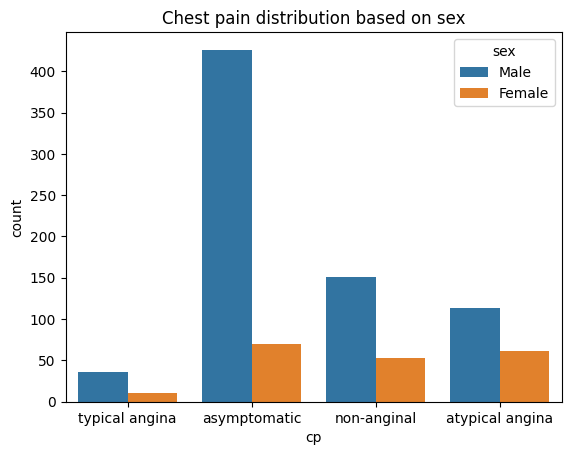

In [33]:
sns.countplot(data=df, x='cp', hue='sex')
plt.title("Chest pain distribution based on sex")
plt.show()

In [2]:
import pandas as pd
df2= pd.read_csv("D:/heart_disease_prediction/data/transformed_heart_disease.csv")

df2.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64

In [20]:
import pandas as pd
import joblib
import numpy as np

# Load the model
model = joblib.load(open('D:/heart_disease_prediction/models/best_random_forest_model.pkl', 'rb'))

# Input array with 13 features (for example)
arr = np.array([-1.7528277940709445,1,2,-0.10821663813700054,0.45963381976742734,0,2,1.9619791816424368,0,2.502889284007581,1,-0.3613997335382652,2
                
]).reshape(1, -1)

# Make a prediction
prediction = model.predict(arr)

print(f"Prediction: {prediction}")


Prediction: [0]


c:\Users\DELL\anaconda3\envs\cuda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
